In [1]:
import pandas as pd
import requests
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
url_servidores_maio = 'http://dados.prefeitura.sp.gov.br/dataset/bf5df0f4-4fb0-4a5e-b013-07d098cc7b1c/resource/8d882ad4-e497-43fb-9586-371eaa640a99/download/verificadoativos02-06-2023mai-2023.csv'

In [4]:
def load_file(fname='servidores_maio.csv', url = url_servidores_maio):
    
    if os.path.isfile(fname):
        return pd.read_csv(fname, sep=';', encoding='latin-1')
        
    with requests.get(url_servidores_maio) as r:
        csv_data = r.text
    
    with open(fname, 'w') as f:
        f.write(csv_data)
    return pd.read_csv(fname, sep=';', encoding='latin-1')

In [5]:
df = load_file()

In [6]:
df.head()

,REGISTRO,VINCULO,NOME,CARGO_BASICO,REF_CARGO_BAS,SEGMENTO,GRUPO,SUBGRUPO,ESCOL_CARGO_BASICO,CARGO_COMISSAO,...,JORNADA,DATA_INICIO_EXERC,REL_JUR_ADM,SECRET_SUBPREF,SETOR,ORGAO_EXT,SEXO,ANO_NASCIMENTO,RACA,DEFICIENTE
0,1145541,16,CLEUZA BORGES PEREIRA SILVA,ASSESSOR IV,CDA-4,NaN,QC,CARGO EM COMISSAO,NAO SE APLICA,NaN,...,40 H,01/06/2022,EM COMISSAO,SECRETARIA MUNICIPAL DE GESTAO,ASSESSORIA JURIDICA,NaN,F,1949,PARDA,NAO
1,1154231,2,IOLANDA RIGON,FISCAL DE POSTURAS MUNICIPAIS NIVEL III,QFPM14,NaN,QFPM,SUPERIOR,SUPERIOR COMPLETO,NaN,...,40 H,07/10/1992,EFETIVO,SUBPREFEITURA LAPA,UNIDADE TECNICA DE FISCALIZACAO,NaN,F,1949,BRANCA,NAO
2,1159470,2,JOSE EDUARDO SOARES DE CASTRO,ANALISTA DE INFORMACOES CULTURA E DESPORTO (NQ...,QDHS17,BIBLIOTECONOMIA,QDHS,SUPERIOR,SUPERIOR COMPLETO,NaN,...,40 H,13/08/1982,EFETIVO,PROCURADORIA GERAL DO MUNICIPIO,CENTRO ESTUDOS JURIDICOS - CEJUR,NaN,M,1951,BRANCA,NAO
3,1160478,2,JULIO DE CARVALHO,FISCAL DE POSTURAS MUNICIPAIS NIVEL III,QFPM13,NaN,QFPM,SUPERIOR,SUPERIOR COMPLETO,NaN,...,40 H,15/12/1981,EFETIVO,SUBPREFEITURA SANTANA/TUCURUVI,SUPERVISÃO TECNICA DE FISCALIZACAO,NaN,M,1951,BRANCA,NAO
4,1161181,9,NEUSA PEDRAO NASSIR,ASSESSOR V,CDA-5,NaN,QC,CARGO EM COMISSAO,NAO SE APLICA,NaN,...,40 H,01/06/2022,EM COMISSAO,SECRETARIA DO GOVERNO MUNICIPAL,ASSESSORIA JURIDICA,NaN,F,1947,BRANCA,NAO


In [7]:
df['GRUPO'].unique()

array(['QC', 'QFPM', 'QDHS', 'QEAG', 'QPE LEI 14660/07',
       'QPE L. 14660/07 RGPS', 'QMB', 'QS', 'QPA', 'ATIVID ARTISTICAS',
       'QPDU', 'QPE', 'QGAS', 'QTG', 'PCCS', 'QUADRO PRM',
       'QPS LEI 14713/08', 'NQTG', 'EDUCACAO', 'QPAT', 'QPS',
       'QUADRO GERAL', 'QPF', 'NAO SERVIDORES', 'CLT - AHM', 'QPGG',
       'QPG', 'QAV', 'ATIV ARTISTICA RGPS', 'AGENTE POLITICO'],
      dtype=object)

In [8]:
qpg = df[df['GRUPO']=='QPGG'].reset_index(drop=True)

In [9]:
qpg.head()

,REGISTRO,VINCULO,NOME,CARGO_BASICO,REF_CARGO_BAS,SEGMENTO,GRUPO,SUBGRUPO,ESCOL_CARGO_BASICO,CARGO_COMISSAO,...,JORNADA,DATA_INICIO_EXERC,REL_JUR_ADM,SECRET_SUBPREF,SETOR,ORGAO_EXT,SEXO,ANO_NASCIMENTO,RACA,DEFICIENTE
0,6394604,3,CLAUDIO AGUIAR ALMEIDA,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENT...,APPGG1,NaN,QPGG,SUPERIOR,SUPERIOR COMPLETO,NaN,...,40 H,01/10/2021,EFETIVO,SECRETARIA MUNICIPAL DE CULTURA,SECRETARIA MUNICIPAL DE CULTURA,NaN,M,1963,PRETA,NAO
1,7575491,2,MAURICIO DA SILVA CORREIA,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENT...,APPGG1,NaN,QPGG,SUPERIOR,SUPERIOR COMPLETO,NaN,...,40 H,03/11/2021,EFETIVO,SECRETARIA MUNICIPAL DE GESTAO,SECRETARIA MUNICIPAL DE GESTAO,PREFEITURA MUNICIPAL DE SALVADOR - BA,M,1986,BRANCA,NAO
2,7718543,6,MARCIA MIYUKI ISHIKAWA,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENT...,APPGG1,NaN,QPGG,SUPERIOR,SUPERIOR COMPLETO,NaN,...,40 H,08/12/2021,EFETIVO,SECRETARIA MUNICIPAL DE HABITACAO,DEPARTAMENTO DE PLANEJAMENTO HABITACIONAL,NaN,F,1978,BRANCA,NAO
3,7792964,2,MARCELO FIDALGO NEVES,AUDITOR MUNICIPAL DE CONTROLE INTERNO - NIVEL I,AMCI2,GERAL,QPGG,SUPERIOR,SUPERIOR COMPLETO,DIRETOR I,...,40 H,21/01/2019,EFETIVO,CONTROLADORIA GERAL DO MUNICIPIO,DIVISAO DE AUDITORIA DE DESENVOLVIMENTO HUMANO...,NaN,M,1987,BRANCA,NAO
4,7794720,2,TIAGO ROSA MACHADO,ANALISTA POLITICAS PUBLICAS GESTAO GOVERNAMENT...,APPGG1,NaN,QPGG,SUPERIOR,SUPERIOR COMPLETO,NaN,...,40 H,05/01/2022,EFETIVO,SECRETARIA MUNICIPAL DE ESPORTES E LAZER,SECRETARIA MUNICIPAL DE ESPORTES E LAZER,NaN,M,1983,BRANCA,NAO


In [10]:
qpg['REF_CARGO_BAS'].unique()

array(['APPGG1', 'AMCI2', 'APPGG3', 'AMCI4', 'APPGG4', 'APPGG2', 'AMCI1',
       'AMCI3'], dtype=object)

In [11]:
appgg = qpg[qpg['REF_CARGO_BAS'].str.contains('APPGG')].reset_index(drop=True)

In [12]:
len(appgg)

142

In [13]:
appgg.keys()

Index(['REGISTRO', 'VINCULO', 'NOME', 'CARGO_BASICO', 'REF_CARGO_BAS',
       'SEGMENTO', 'GRUPO', 'SUBGRUPO', 'ESCOL_CARGO_BASICO', 'CARGO_COMISSAO',
       'REF_CARGO_COM', 'ESCOL_CARGO_COMISSAO', 'JORNADA', 'DATA_INICIO_EXERC',
       'REL_JUR_ADM', 'SECRET_SUBPREF', 'SETOR', 'ORGAO_EXT', 'SEXO',
       'ANO_NASCIMENTO', 'RACA', 'DEFICIENTE'],
      dtype='object')

In [14]:
appgg['dt_inicio'] = pd.to_datetime(appgg['DATA_INICIO_EXERC'], format='%d/%m/%Y')

In [15]:
appgg['ano_inicio'] = appgg['dt_inicio'].dt.year

In [16]:
nomeacoes_ano = appgg['ano_inicio'].value_counts()

In [17]:
if not os.path.exists: os.mkdir('graficos_alocaoes')

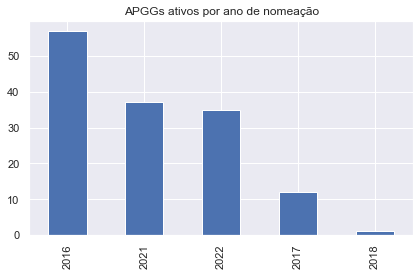

In [18]:
ax = nomeacoes_ano.plot.bar(title='APGGs ativos por ano de nomeação')
fig = ax.get_figure()
plt.tight_layout()
fig.savefig(os.path.join('graficos_alocaoes', 'apgg_ativos_por_ano.png'))


<AxesSubplot:>

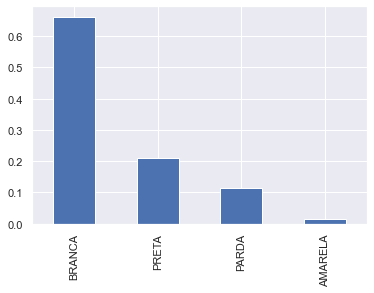

In [19]:
dist_raca = appgg['RACA'].value_counts(normalize=True)
dist_raca.plot.bar()

In [20]:
appgg['has_cargo'] = appgg['CARGO_COMISSAO'].notnull()

appgg['has_cargo'] = appgg['has_cargo'].apply(lambda x: 'Sim' if x else 'Não')

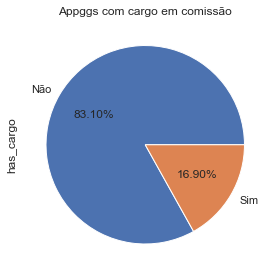

In [21]:
ax = appgg['has_cargo'].value_counts().plot.pie(title='Appggs com cargo em comissão', autopct='%1.2f%%')
fig = ax.get_figure()
plt.tight_layout()
fig.savefig(os.path.join('graficos_alocaoes', 'appgs_com_cargo_comissao.png'))

In [22]:
com_cargo = appgg[appgg['has_cargo']=='Sim'].reset_index(drop=True)

In [23]:
com_cargo['CARGO_COMISSAO'].unique()

array(['ASSESSOR III', 'ASSESSOR II', 'COORDENADOR II', 'ASSESSOR IV',
       'DIRETOR I', 'CHEFE DE ASSESSORIA II', 'ASSESSOR V', 'DIRETOR II',
       'CHEFE DE ASSESSORIA I', 'COORDENADOR I', 'CHEFE DE NUCLEO I',
       'SECRETARIO-ADJUNTO'], dtype=object)

In [24]:
com_cargo['cargo'] = com_cargo['CARGO_COMISSAO'].str.split(' ').apply(lambda x: ' '.join(x[:-1]) if len(x)>1 else ''.join(x))

In [25]:
com_cargo['cargo'].unique()

array(['ASSESSOR', 'COORDENADOR', 'DIRETOR', 'CHEFE DE ASSESSORIA',
       'CHEFE DE NUCLEO', 'SECRETARIO-ADJUNTO'], dtype=object)

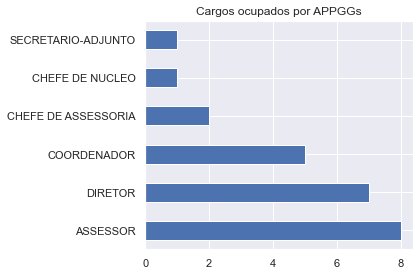

In [26]:
ax = com_cargo['cargo'].value_counts().plot.barh(title='Cargos ocupados por APPGGs')
fig = ax.get_figure()
plt.tight_layout()
fig.savefig(os.path.join('graficos_alocaoes', 'tipos_de_cargo.png'))

In [27]:
appgg['SECRET_SUBPREF'].unique()

array(['SECRETARIA MUNICIPAL DE CULTURA',
       'SECRETARIA MUNICIPAL DE GESTAO',
       'SECRETARIA MUNICIPAL DE HABITACAO',
       'SECRETARIA MUNICIPAL DE ESPORTES E LAZER',
       'SECRETARIA MUNICIPAL DA PESSOA COM DEFICIENCIA',
       'SECRETARIA MUNICIPAL DA SAUDE', 'SECRETARIA DO GOVERNO MUNICIPAL',
       'SECRETARIA MUNICIPAL DE URBANISMO E LICENCIAMENTO',
       'SECRETARIA MUNICIPAL DE RELACOES INTERNACIONAIS',
       'SECRETARIA MUNICIPAL DE ASSIST E DESENV SOCIAL', 'CASA CIVIL',
       'SECRETARIA MUNICIPAL DE DESENVOLVIMENTO ECONOMICO',
       'SECRETARIA MUNICIPAL DE EDUCACAO',
       'CONTROLADORIA GERAL DO MUNICIPIO',
       'SECRETARIA MUNICIPAL DA FAZENDA',
       'SECRETARIA MUNICIPAL DE MOBILIDADE E TRANSITO',
       'GABINETE DO PREFEITO',
       'SECRETARIA MUNICIPAL DO VERDE E DO MEIO AMBIENTE',
       'SECRETARIA MUNICIPAL DE DIREITOS HUMANOS E CIDADAN',
       'PROCURADORIA GERAL DO MUNICIPIO',
       'SECRETARIA MUNICIPAL DE INOVACAO E TECNOLOGIA',
       '

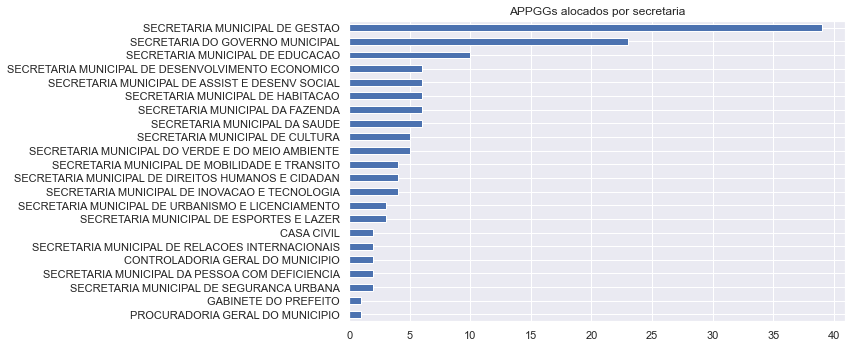

In [28]:
ax = appgg['SECRET_SUBPREF'].value_counts().sort_values(ascending=True).plot.barh(title='APPGGs alocados por secretaria')
fig = ax.get_figure()
fig.set_size_inches(12, 5)
plt.tight_layout()
fig.savefig(os.path.join('graficos_alocaoes', 'alocaoes_por_secretaria.png'))
